![](images/ml_0.png)

![](images/linear_regression.png)

![](images/logistic_regression.png)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
plt.rcParams['figure.figsize'] = (6,4)

In [42]:
df = pd.read_csv('data/diabetes.csv')

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data 

In [44]:
X = df.drop('Outcome', axis=1)

In [45]:
y = df['Outcome']

## sklearn

![](images/sklearn_0.png)

## Train

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter=1000)

![](images/regression_0.png)

![](images/ml_1.png)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0])

![](images/confussion_matrix.png)

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [20]:
sum(y_test)

40

In [21]:
confusion_matrix(y_test, y_pred)

array([[60, 16],
       [12, 28]])

<AxesSubplot: >

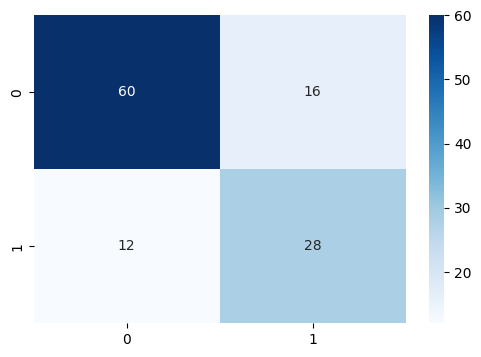

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.64      0.70      0.67        40

    accuracy                           0.76       116
   macro avg       0.73      0.74      0.74       116
weighted avg       0.77      0.76      0.76       116



In [17]:
precision_score(y_test, y_pred)

0.6363636363636364

In [18]:
recall_score(y_test, y_pred)

0.7

In [19]:
f1_score(y_test, y_pred)

0.6666666666666666

![](images/roc.png)

In [26]:
from sklearn.metrics import auc, roc_curve

In [27]:
p = model.predict_proba(X_test)

In [28]:
fpr, tpr, th = roc_curve(y_test, p[:,1])

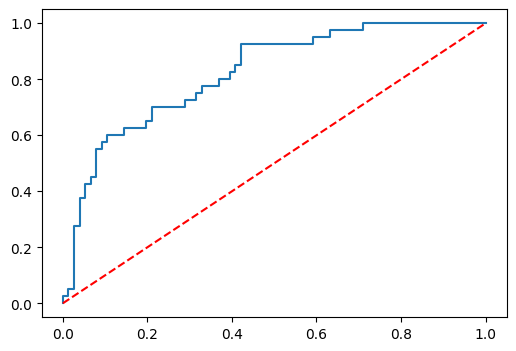

In [30]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [31]:
auc(fpr, tpr)

0.8210526315789474